In [52]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import codecs
import collections

### Define

In [3]:
home = "NUFC"
away = "Arsenal"

### Load Data and Preprocessing

In [4]:
# Read file
tweets_file = open("../../EPLdata/1508292045_NUFCvsARSENAL.txt", "r")

In [5]:
# Parsing JSON

tweets_data = []
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [6]:
tweets_file.close()

In [7]:
print len(tweets_data)

16831


In [8]:
# tweets_data[100]

### Create DataFrame as tweets

In [8]:
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets['hashtags'] = map(lambda tweet: map(lambda tag: tag['text'], tweet['entities']['hashtags']), tweets_data)

In [9]:
# 0: no tags, 3: both team tags, 1: only home team tags, 2: only away team tags, 4: other tags
def find_tag(tag):
    if not tag:
        return 0
    if home in tag and away in tag:
        return 3
    if home in tag:
        return 1
    if away in tag:
        return 2
    else:
        return 4

tweets["tag_num"] = map(lambda tags: find_tag(tags), tweets['hashtags'])

In [10]:
tweets.head()

,text,lang,country,hashtags,tag_num
0,"Newcastle XI v Arsenal: Krul, Janmaat, Mbemba,...",ro,None,"[NUFC, AFC]",1
1,RT @spe_football: { #BPL } Coup d'envoi Newcas...,en,None,"[BPL, NEWARS, NUFC, Arsenal]",3
2,Arranca el partido entre #NUFC y #Arsenal ¡Gun...,es,None,"[NUFC, Arsenal]",3
3,RT @CabinaDeporte: ya estamos en directo en ht...,es,None,"[NUFCvAFC, arsenal, NUFC, BPL]",1
4,I'd take another draw this week #NUFC,en,None,[NUFC],1


In [11]:
home_hashtags = len(tweets[tweets["tag_num"] == 1])
away_hashtags = len(tweets[tweets["tag_num"] == 2])
both_hashtags = len(tweets[tweets["tag_num"] == 3])
no_hashtags = len(tweets[tweets["tag_num"] == 4])
other_hashtags = len(tweets[tweets["tag_num"] == 0])

print "Home Team Tags: ", home_hashtags
print "Away Team Tags: ", away_hashtags
print "Both Team Tags: ", both_hashtags
print "Other Team Tags: ", other_hashtags
print "No Tags: \t", no_hashtags
print "All Tweets: ", len(tweets)

Home Team Tags:  5110
Away Team Tags:  5597
Both Team Tags:  2222
Other Team Tags:  529
No Tags: 	3373
All Tweets:  16831


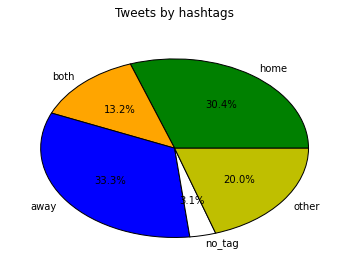

In [12]:
# Plot Hashtags Pie
slices = [home_hashtags, both_hashtags, away_hashtags, other_hashtags, no_hashtags]
activities = ['home','both','away', 'no_tag', 'other']
cols = ['g','orange','b', 'w', 'y']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Tweets by hashtags\n')
plt.show()

### Top 5 languages

en     13620
es       659
und      608
in       388
fr       285
dtype: int64

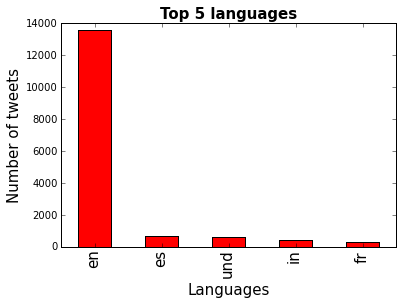

In [13]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
tweets_by_lang[:5]

### Top 5 countries

United Kingdom    339
Algeria           137
United States      93
Indonesia          34
France             21
dtype: int64

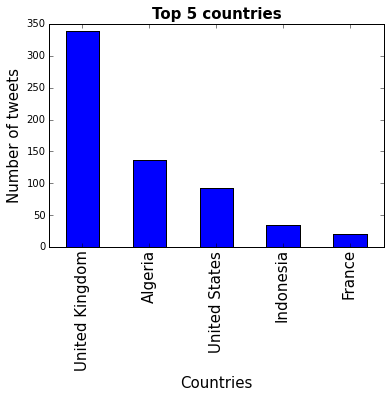

In [14]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
tweets_by_country[:5]

In [15]:
# tweets_by_country

In [16]:
print "country: ", sum(tweets_by_country)
print "None: ", len(tweets_data) - sum(tweets_by_country)

country:  860
None:  15971


### Count All Words

In [17]:
tweets_eng = tweets[tweets["lang"] == "en"]
tweets_eng.head()

,text,lang,country,hashtags,tag_num
1,RT @spe_football: { #BPL } Coup d'envoi Newcas...,en,None,"[BPL, NEWARS, NUFC, Arsenal]",3
4,I'd take another draw this week #NUFC,en,None,[NUFC],1
5,Yeay Walcott 👍 #NUFC v #Arsenal,en,None,"[NUFC, Arsenal]",3
6,RT @spe_football: { #BPL } Coup d'envoi Newcas...,en,None,"[BPL, NEWARS, NUFC, Arsenal]",3
7,RT @NUFC: #NUFC get us underway here at St. Ja...,en,None,[NUFC],1


In [18]:
print len(tweets_eng)

13620


In [19]:
# create all words lists
all_words = []

for tweet in tweets_eng["text"]:
    tweet_words = word_tokenize(tweet)
    for word in tweet_words:
        all_words.append(word.lower())

In [20]:
# count all words
counted_all_words = collections.Counter(all_words)
counted_all_words.most_common()[:20]

[(u'#', 22837),
 (u':', 13132),
 (u'arsenal', 8964),
 (u'nufc', 8662),
 (u'@', 7794),
 (u'.', 7750),
 (u'rt', 5785),
 (u'a', 4902),
 (u'the', 4832),
 (u'http', 4556),
 (u'!', 4065),
 (u'to', 3203),
 (u',', 2861),
 (u'mitrovic', 2500),
 (u'for', 2415),
 (u'on', 2298),
 (u'red', 2232),
 (u'is', 2140),
 (u"'s", 1938),
 (u'newcastle', 1903)]

### Extract Adjective Words

In [22]:
tweets_eng['text'][16794]

u"Arsenal are so soft that they couldn't even be called a soap, they are a fuckin handwash. #NUFC #NUFCvAFC #Arsenal #AFC"

In [23]:
nltk.pos_tag(word_tokenize(tweets_eng['text'][16794]))

[(u'Arsenal', 'NNP'),
 (u'are', 'VBP'),
 (u'so', 'RB'),
 (u'soft', 'JJ'),
 (u'that', 'IN'),
 (u'they', 'PRP'),
 (u'could', 'MD'),
 (u"n't", 'RB'),
 (u'even', 'RB'),
 (u'be', 'VB'),
 (u'called', 'VBN'),
 (u'a', 'DT'),
 (u'soap', 'NN'),
 (u',', ','),
 (u'they', 'PRP'),
 (u'are', 'VBP'),
 (u'a', 'DT'),
 (u'fuckin', 'NN'),
 (u'handwash', 'NN'),
 (u'.', '.'),
 (u'#', '#'),
 (u'NUFC', 'NNP'),
 (u'#', '#'),
 (u'NUFCvAFC', 'NNP'),
 (u'#', '#'),
 (u'Arsenal', 'NNP'),
 (u'#', '#'),
 (u'AFC', 'NNP')]

In [79]:
# create J all words lists
all_J_words = []

#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

for tweet in tweets_eng["text"]:
    
    tweet_words = word_tokenize(tweet)
    
    tweet_words_pos = nltk.pos_tag(tweet_words)
    
    for word in tweet_words_pos:
        if word[1][0] in allowed_word_types and word[0][0] != "/":
            all_J_words.append(word[0].lower())

In [80]:
# count J all words
counted_all_J_words = collections.Counter(all_J_words)
counted_all_J_words.most_common()[:20]

[(u'arsenal', 1077),
 (u'late', 440),
 (u'live', 376),
 (u'newcastle-united', 277),
 (u'first', 264),
 (u'yellow', 252),
 (u'ht\u2026', 249),
 (u'red', 246),
 (u'colourful', 166),
 (u'great', 156),
 (u'foul', 151),
 (u'massive', 150),
 (u'good', 135),
 (u'heavier', 126),
 (u'more', 121),
 (u'last', 118),
 (u'clinical', 106),
 (u'mitrovic', 103),
 (u'best', 103),
 (u'florian', 97)]

In [81]:
counted_all_J_words.most_common()

[(u'arsenal', 1077),
 (u'late', 440),
 (u'live', 376),
 (u'newcastle-united', 277),
 (u'first', 264),
 (u'yellow', 252),
 (u'ht\u2026', 249),
 (u'red', 246),
 (u'colourful', 166),
 (u'great', 156),
 (u'foul', 151),
 (u'massive', 150),
 (u'good', 135),
 (u'heavier', 126),
 (u'more', 121),
 (u'last', 118),
 (u'clinical', 106),
 (u'mitrovic', 103),
 (u'best', 103),
 (u'florian', 97),
 (u'big', 90),
 (u'new', 86),
 (u'harsh', 86),
 (u'pen', 85),
 (u'easier', 78),
 (u'studs-up', 74),
 (u'few', 71),
 (u'bad', 71),
 (u'real', 70),
 (u'like\u2026', 69),
 (u'17th', 66),
 (u'mitrovic\u2019s', 64),
 (u'other', 63),
 (u'incredible', 58),
 (u'many', 57),
 (u'early', 57),
 (u'old', 57),
 (u'least', 56),
 (u'clear', 56),
 (u'top', 53),
 (u'wrong', 50),
 (u'ridiculous', 49),
 (u'full-time', 49),
 (u'terrible', 47),
 (u'sure', 46),
 (u'same', 46),
 (u'poor', 46),
 (u'kick-off', 45),
 (u'extra', 41),
 (u'most', 38),
 (u'horrible', 37),
 (u'huge', 36),
 (u'devastated', 36),
 (u'absolute', 35),
 (u'second

In [ ]:
# tweets.head()
# tweets.tail()
# tweets.columns
# tweets.values
# tweets.values[0]
tweets.describe()
# tweets.T
# tweets.sort_index(axis=1, ascending=False)
# tweets.sort(columns='lang')
# tweets['lang']
# tweets.text
# tweets[0:5]
# tweets.loc[:,['text','country']]
# tweets.loc[1:7,['text','lang']]
# tweets.loc[1,['text','lang']]
# tweets.iloc[1:3, 0:3]
# tweets.groupby(['lang', 'country']).sum()

### Tweets Sentiment

In [25]:
# sentiment_mod.py
import sentiment_mod as s

In [28]:
print tweets_eng['text'][16794]
print s.sentiment(tweets_eng['text'][16794])

Arsenal are so soft that they couldn't even be called a soap, they are a fuckin handwash. #NUFC #NUFCvAFC #Arsenal #AFC
('neg', 0.8)


In [45]:
home_tweets = tweets_eng[tweets_eng["tag_num"] == 1]
away_tweets = tweets_eng[tweets_eng["tag_num"] == 2]

In [46]:
home_tweets.head()

,text,lang,country,hashtags,tag_num
4,I'd take another draw this week #NUFC,en,None,[NUFC],1
7,RT @NUFC: #NUFC get us underway here at St. Ja...,en,None,[NUFC],1
14,"All three points, lets go lads! #NUFC",en,None,[NUFC],1
20,Kick off \n\n#NUFC VS #ARSENAL,en,None,"[NUFC, ARSENAL]",1
22,"RT @Sporting_AND: #NUFC take on Arsenal today,...",en,None,"[NUFC, rsca, newars]",1


In [47]:
away_tweets.head()

,text,lang,country,hashtags,tag_num
8,Newcastle 0:0 #Arsenal in motion.,en,None,[Arsenal],2
19,Kick Off #Arsenal vs #NCUTD,en,None,"[Arsenal, NCUTD]",2
38,Well done Mo #Farah. Now to the #Arsenal game.,en,None,"[Farah, Arsenal]",2
40,We by far the greatest team the world have eve...,en,None,[Arsenal],2
45,Oxlade-Chamberlain and Walcott are on at the s...,en,United States,[Arsenal],2


In [57]:
type(home_tweets)

pandas.core.frame.DataFrame

In [56]:
s.sentiment(home_tweets["text"][4])

('neg', 0.8)

In [67]:
# map(lambda tweet: s.sentiment(tweet), home_tweets["text"])

In [65]:
import pandas as pd

In [69]:
home_tweets = pd.DataFrame(home_tweets.values, range(len(home_tweets)), home_tweets.columns)
away_tweets = pd.DataFrame(away_tweets.values, range(len(away_tweets)), away_tweets.columns)

In [70]:
home_tweets.head()

,text,lang,country,hashtags,tag_num
0,I'd take another draw this week #NUFC,en,None,[NUFC],1
1,RT @NUFC: #NUFC get us underway here at St. Ja...,en,None,[NUFC],1
2,"All three points, lets go lads! #NUFC",en,None,[NUFC],1
3,Kick off \n\n#NUFC VS #ARSENAL,en,None,"[NUFC, ARSENAL]",1
4,"RT @Sporting_AND: #NUFC take on Arsenal today,...",en,None,"[NUFC, rsca, newars]",1


In [71]:
away_tweets.head()

,text,lang,country,hashtags,tag_num
0,Newcastle 0:0 #Arsenal in motion.,en,None,[Arsenal],2
1,Kick Off #Arsenal vs #NCUTD,en,None,"[Arsenal, NCUTD]",2
2,Well done Mo #Farah. Now to the #Arsenal game.,en,None,"[Farah, Arsenal]",2
3,We by far the greatest team the world have eve...,en,None,[Arsenal],2
4,Oxlade-Chamberlain and Walcott are on at the s...,en,United States,[Arsenal],2


## Sentiment Analysis

In [89]:
home_sent = map(lambda tweet: s.sentiment(tweet)[0], home_tweets["text"])

In [93]:
away_sent = map(lambda tweet: s.sentiment(tweet)[0], away_tweets["text"])

In [96]:
print "Home Team:", collections.Counter(home_sent)
print "Away Team:", collections.Counter(away_sent)

Home Team: Counter({'neg': 3642, 'pos': 702})
Away Team: Counter({'neg': 3735, 'pos': 783})


In [99]:
home_sent = collections.Counter(home_sent)
away_sent = collections.Counter(away_sent)

In [100]:
home_sent.values

<function values>

Positive Tweets:  702
Negative Tweets:  3642


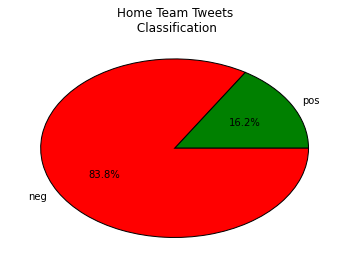

In [105]:
slices = [home_sent['pos'], home_sent['neg']]
activities = ['pos', 'neg']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Home Team Tweets \n Classification')

print "Positive Tweets: ", home_sent['pos']
print "Negative Tweets: ", home_sent['neg']

plt.show()

Positive Tweets:  783
Negative Tweets:  3735


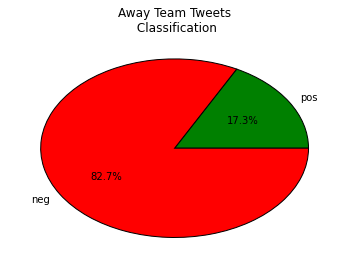

In [104]:
slices = [away_sent['pos'], away_sent['neg']]
activities = ['pos', 'neg']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Away Team Tweets \n Classification')

print "Positive Tweets: ", away_sent['pos']
print "Negative Tweets: ", away_sent['neg']

plt.show()

In [2]:
import sentiment_aware
tok = sentiment_aware.Tokenizer(preserve_case=False)

In [6]:
tok = sentiment_aware.Tokenizer(preserve_case=False)
samples = (
        u"RT @ #happyfuncoding#: this is a typical Twitter tweet :-)",
        u"HTML entities &amp; other Web oddities can be an &aacute;cute <em class='grumpy'>pain</em> >:(",
        u"It's perhaps noteworthy that phone numbers like +1 (800) 123-4567, (800) 123-4567, and 123-4567 are treated as words despite their whitespace."
        )

for s in samples:
    print "======================================================================"
    print s
    tokenized = tok.tokenize(s)
    print tokenized
    print "\n".join(tokenized)

RT @ #happyfuncoding#: this is a typical Twitter tweet :-)
[u'rt', u'@', u'#happyfuncoding', u'#', u':', u'this', u'is', u'a', u'typical', u'twitter', u'tweet', u':-)']
rt
@
#happyfuncoding
#
:
this
is
a
typical
twitter
tweet
:-)
HTML entities &amp; other Web oddities can be an &aacute;cute <em class='grumpy'>pain</em> >:(
[u'html', u'entities', u'and', u'other', u'web', u'oddities', u'can', u'be', u'an', u'\xe1cute', u"<em class='grumpy'>", u'pain', u'</em>', u'>:(']
html
entities
and
other
web
oddities
can
be
an
ácute
<em class='grumpy'>
pain
</em>
>:(
It's perhaps noteworthy that phone numbers like +1 (800) 123-4567, (800) 123-4567, and 123-4567 are treated as words despite their whitespace.
[u"it's", u'perhaps', u'noteworthy', u'that', u'phone', u'numbers', u'like', u'+1 (800) 123-4567', u',', u'(800) 123-4567', u',', u'and', u'123-4567', u'are', u'treated', u'as', u'words', u'despite', u'their', u'whitespace', u'.']
it's
perhaps
noteworthy
that
phone
numbers
like
+1 (800) 123-4567